In [13]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision.transforms as transforms # used to tranform data into torch tensors

In [14]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [15]:
len(dataset)

60000

In [16]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset) , dataset[0]

(10000, (<PIL.Image.Image image mode=L size=28x28 at 0x16795383148>, 5))

Label: 5


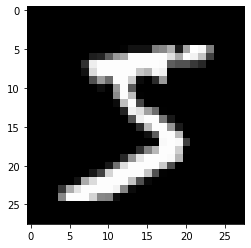

In [17]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [18]:
# convert dataset into torch tensors
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [19]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [20]:
# Split dataset into training and validation
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [21]:
# load data into batches 
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [25]:
for x in train_loader:
    print(x)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

### Model

In [26]:
import torch.nn as nn

input_size = 28*28 # as linear takes vector
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [27]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0045, -0.0232, -0.0070,  ..., -0.0278,  0.0215, -0.0120],
        [-0.0134,  0.0121,  0.0081,  ...,  0.0132, -0.0167, -0.0056],
        [-0.0292,  0.0352,  0.0097,  ...,  0.0339,  0.0144,  0.0232],
        ...,
        [ 0.0248, -0.0264, -0.0183,  ...,  0.0273,  0.0136,  0.0227],
        [ 0.0150,  0.0145, -0.0323,  ...,  0.0160, -0.0142, -0.0185],
        [ 0.0348,  0.0246,  0.0338,  ..., -0.0257,  0.0170, -0.0220]],
       requires_grad=True)

In [28]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 4, 8, 4, 4, 0, 2, 6, 3, 1, 1, 9, 8, 2, 5, 0, 9, 4, 4, 1, 6, 8, 0, 8,
        0, 5, 8, 6, 5, 6, 5, 9, 7, 8, 7, 2, 3, 2, 5, 5, 9, 7, 4, 7, 3, 2, 4, 7,
        7, 1, 4, 4, 6, 5, 4, 6, 5, 6, 2, 3, 6, 7, 3, 3, 4, 4, 8, 1, 9, 1, 4, 5,
        9, 3, 2, 2, 3, 6, 0, 7, 2, 0, 9, 0, 5, 0, 4, 4, 3, 7, 0, 5, 8, 7, 7, 8,
        0, 5, 0, 7, 5, 7, 5, 2, 8, 0, 5, 2, 1, 2, 1, 6, 3, 5, 4, 2, 9, 3, 8, 3,
        0, 2, 3, 0, 3, 5, 0, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [29]:
# custom model which have reshape to fix the above error
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0260,  0.0228,  0.0073,  ...,  0.0129, -0.0305,  0.0069],
         [-0.0284, -0.0186, -0.0179,  ...,  0.0263, -0.0113,  0.0219],
         [ 0.0344, -0.0156,  0.0248,  ...,  0.0350,  0.0229,  0.0227],
         ...,
         [ 0.0080,  0.0100,  0.0024,  ...,  0.0221,  0.0053, -0.0177],
         [-0.0287,  0.0178, -0.0073,  ..., -0.0254,  0.0341,  0.0035],
         [ 0.0247, -0.0301,  0.0310,  ..., -0.0255, -0.0258, -0.0165]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0225, -0.0182, -0.0167,  0.0042, -0.0291, -0.0005,  0.0244, -0.0179,
          0.0242, -0.0157], requires_grad=True)]

In [31]:
# Predictions 
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.3720,  0.0560, -0.0020,  0.1757, -0.4344,  0.0513,  0.4672, -0.4257,
         -0.0944,  0.4281],
        [-0.0561, -0.1406, -0.0978,  0.0795, -0.2493,  0.0331, -0.0552,  0.0733,
         -0.2260,  0.0947]])


In [32]:
# we need to convert this into probablities 
# softmax function
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())


Sample probabilities:
 tensor([[0.1308, 0.0953, 0.0900, 0.1075, 0.0584, 0.0949, 0.1438, 0.0589, 0.0820,
         0.1383],
        [0.0991, 0.0911, 0.0951, 0.1135, 0.0817, 0.1084, 0.0992, 0.1128, 0.0836,
         0.1153]])
Sum:  1.0


In [33]:
# returning the max probability from the output row
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 9, 5, 0, 0, 3, 3, 0, 2, 9, 3, 5, 9, 5, 0, 2, 0, 3, 3, 9, 0, 0, 0, 2,
        6, 3, 0, 5, 3, 0, 3, 3, 8, 9, 3, 3, 0, 0, 5, 0, 0, 3, 3, 3, 9, 3, 3, 0,
        2, 3, 3, 9, 0, 0, 3, 0, 2, 3, 5, 3, 3, 3, 6, 3, 9, 8, 9, 9, 0, 0, 3, 0,
        0, 3, 2, 9, 3, 9, 9, 9, 9, 3, 8, 0, 3, 3, 0, 0, 3, 0, 3, 9, 0, 0, 3, 3,
        0, 9, 0, 3, 5, 3, 0, 9, 9, 1, 0, 3, 5, 3, 3, 3, 3, 0, 0, 3, 7, 5, 0, 9,
        1, 9, 0, 9, 0, 0, 3, 9])
tensor([0.1438, 0.1153, 0.1312, 0.1411, 0.1382, 0.1400, 0.1184, 0.1359, 0.1399,
        0.1296, 0.1225, 0.1325, 0.1604, 0.1311, 0.1350, 0.1314, 0.1576, 0.1447,
        0.1383, 0.1245, 0.1332, 0.1427, 0.1377, 0.1137, 0.1315, 0.1177, 0.1343,
        0.1252, 0.1455, 0.1582, 0.1417, 0.1212, 0.1255, 0.1425, 0.1337, 0.1345,
        0.1271, 0.1405, 0.1200, 0.1293, 0.1562, 0.1837, 0.1423, 0.1385, 0.1344,
        0.1231, 0.1274, 0.1317, 0.1211, 0.1455, 0.1288, 0.1205, 0.1360, 0.1584,
        0.1381, 0.1243, 0.1213, 0.1227, 0.1333, 0.1176, 0.1378, 0.1321, 0.1241,
       

In [34]:
labels

tensor([4, 6, 7, 2, 3, 5, 8, 6, 0, 8, 7, 7, 9, 5, 5, 3, 3, 0, 7, 1, 1, 5, 3, 8,
        6, 1, 5, 1, 5, 7, 0, 6, 5, 3, 9, 0, 0, 3, 6, 8, 2, 2, 7, 9, 9, 8, 7, 3,
        2, 0, 5, 1, 9, 3, 2, 5, 3, 7, 1, 2, 0, 2, 0, 4, 9, 0, 8, 1, 1, 0, 9, 0,
        2, 8, 8, 3, 8, 5, 1, 1, 4, 2, 3, 5, 2, 7, 6, 2, 4, 6, 0, 9, 8, 6, 9, 4,
        9, 4, 2, 4, 9, 8, 3, 1, 8, 2, 6, 0, 1, 4, 3, 8, 9, 6, 8, 8, 5, 5, 2, 7,
        6, 1, 3, 8, 2, 0, 9, 5])

### Evaluation and loss functions

In [37]:
# returns accuracy of our prediction , cant be used as loss fun, obv!
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)
# very bad accuracy

tensor(0.1016)

In [41]:
# loss function 
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)s

tensor(2.2888, grad_fn=<NllLossBackward0>)
